# 靜態資料量

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

# 读取数据
df = pd.read_csv('靜態資料.csv', encoding='big5')
df = df.drop(columns=['REGION', 'YEAR'])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

# 分割特征和目标变量
y_avg = df['PM2.5平均']
X = df.drop(['PM2.5平均', 'PM2.5最大', 'PM2.5指標'], axis=1)

# 分割训练集和测试集
X_train, X_test, y_avg_train, y_avg_test = train_test_split(X, y_avg, test_size=0.2, random_state=12)

# 計算訓練集和測試集的資料量
train_data_size = len(X_train)
test_data_size = len(X_test)

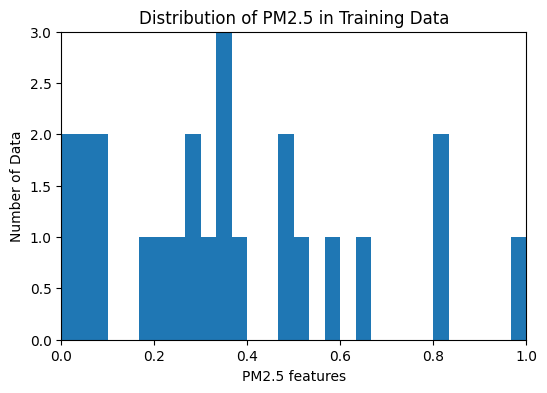

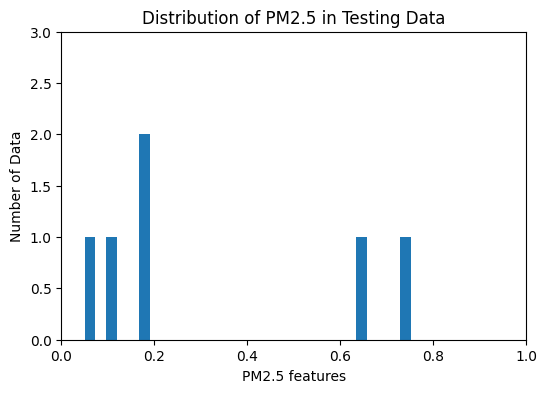

In [ ]:
# 繪製訓練集的資料量與PM2.5分布區間的關係
plt.figure(figsize=(6, 4))
plt.hist(y_avg_train, bins=30)
plt.xlabel('PM2.5 features')
plt.ylabel('Number of Data')
plt.title('Distribution of PM2.5 in Training Data')
plt.xlim([0, 1])  # 固定x軸範圍為0~1
plt.ylim([0, 3])  # 固定y軸範圍為0~3
plt.show()

# 繪製測試集的資料量與PM2.5分布區間的關係
plt.figure(figsize=(6, 4))
plt.hist(y_avg_test, bins=30)
plt.xlabel('PM2.5 features')
plt.ylabel('Number of Data')
plt.title('Distribution of PM2.5 in Testing Data')
plt.xlim([0, 1])  # 固定x軸範圍為0~1
plt.ylim([0, 3])  # 固定y軸範圍為0~3
plt.show()


In [ ]:
# 計算訓練集和測試集的實際數量
train_data_size = len(X_train)
test_data_size = len(X_test)

# 輸出訓練集和測試集的實際數量
print("Training Data Size:", train_data_size)
print("Testing Data Size:", test_data_size)


Training Data Size: 24
Testing Data Size: 6


# 靜態 - RF

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

# 读取数据
df = pd.read_csv('靜態資料.csv', encoding='big5')
df = df.drop(columns=['REGION', 'YEAR'])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

# 分割特征和目标变量
y_avg = df['PM2.5平均']
y_max = df['PM2.5最大']
y_idx = df['PM2.5指標']
X = df.drop(['PM2.5平均', 'PM2.5最大', 'PM2.5指標'], axis=1)

# 分割训练集和测试集
X_train, X_test, y_avg_train, y_avg_test = train_test_split(X, y_avg, test_size=0.2, random_state=12)
_, _, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=12)
_, _, y_idx_train, y_idx_test = train_test_split(X, y_idx, test_size=0.2, random_state=12)

# 建立随机森林回归模型并进行训练
regr_avg = RandomForestRegressor(n_estimators=130, random_state=12)
regr_avg.fit(X_train, y_avg_train)

regr_max = RandomForestRegressor(n_estimators=130, random_state=12)
regr_max.fit(X_train, y_max_train)

regr_idx = RandomForestRegressor(n_estimators=130, random_state=12)
regr_idx.fit(X_train, y_idx_train)

# 进行预测
y_avg_pred = regr_avg.predict(X_test)
y_max_pred = regr_max.predict(X_test)
y_idx_pred = regr_idx.predict(X_test)

# 计算均方根误差（RMSE）
rmse_avg = sqrt(mean_squared_error(y_avg_test, y_avg_pred))
rmse_max = sqrt(mean_squared_error(y_max_test, y_max_pred))
rmse_idx = sqrt(mean_squared_error(y_idx_test, y_idx_pred))

print('平均值 RMSE:', rmse_avg)
print('最大值 RMSE:', rmse_max)
print('指標值 RMSE:', rmse_idx)


平均值 RMSE: 0.09380120984905511
最大值 RMSE: 0.09874450275109671
指標值 RMSE: 0.0823819077627848


In [ ]:
params = regr_avg.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 120, 'n_jobs': None, 'oob_score': False, 'random_state': 12, 'verbose': 0, 'warm_start': False}


- 圖表繪製

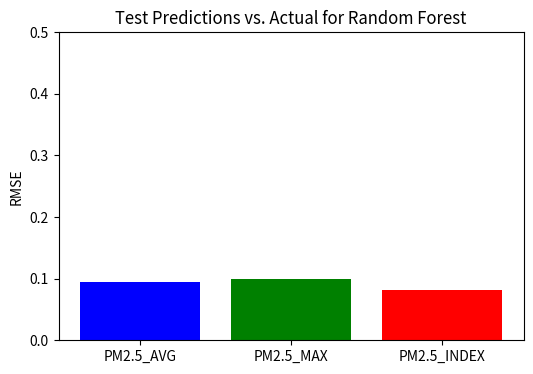

In [26]:
import matplotlib.pyplot as plt

# 绘制直方图
rmse_values = [rmse_avg, rmse_max, rmse_idx]
labels = ['PM2.5_AVG', 'PM2.5_MAX', 'PM2.5_INDEX']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(6, 4))
plt.bar(labels, rmse_values, color=colors)
plt.ylabel('RMSE')
plt.title('Test Predictions vs. Actual for Random Forest')

plt.yticks(np.arange(0, 0.6, 0.1))  # 设置Y轴刻度和标签

plt.show()


# 靜態 - MLP

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

# 读取数据
df = pd.read_csv('靜態資料.csv', encoding='big5')
df = df.drop(columns=['REGION', 'YEAR'])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

# 分割特征和目标变量
y_avg = df['PM2.5平均']
y_max = df['PM2.5最大']
y_idx = df['PM2.5指標']
X = df.drop(['PM2.5平均', 'PM2.5最大', 'PM2.5指標'], axis=1)

# 分割训练集和测试集
X_train, X_test, y_avg_train, y_avg_test = train_test_split(X, y_avg, test_size=0.2, random_state=13)
_, _, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=13)
_, _, y_idx_train, y_idx_test = train_test_split(X, y_idx, test_size=0.2, random_state=13)

# 建立MLP回归模型并进行训练
mlp_avg = MLPRegressor(hidden_layer_sizes=(32, 32), activation='relu', solver='adam', max_iter=100, random_state=13)
mlp_avg.fit(X_train, y_avg_train)

mlp_max = MLPRegressor(hidden_layer_sizes=(32, 32), activation='relu', solver='adam', max_iter=100, random_state=13)
mlp_max.fit(X_train, y_max_train)

mlp_idx = MLPRegressor(hidden_layer_sizes=(32, 32), activation='relu', solver='adam', max_iter=100, random_state=13)
mlp_idx.fit(X_train, y_idx_train)

# 进行预测
y_avg_pred = mlp_avg.predict(X_test)
y_max_pred = mlp_max.predict(X_test)
y_idx_pred = mlp_idx.predict(X_test)

# 计算均方根误差（RMSE）
rmse_avg = sqrt(mean_squared_error(y_avg_test, y_avg_pred))
rmse_max = sqrt(mean_squared_error(y_max_test, y_max_pred))
rmse_idx = sqrt(mean_squared_error(y_idx_test, y_idx_pred))

print('平均值 RMSE:', rmse_avg)
print('最大值 RMSE:', rmse_max)
print('指標值 RMSE:', rmse_idx)


平均值 RMSE: 0.204707839928091
最大值 RMSE: 0.25681717014883193
指標值 RMSE: 0.1847443705233469


- 繪製圖表

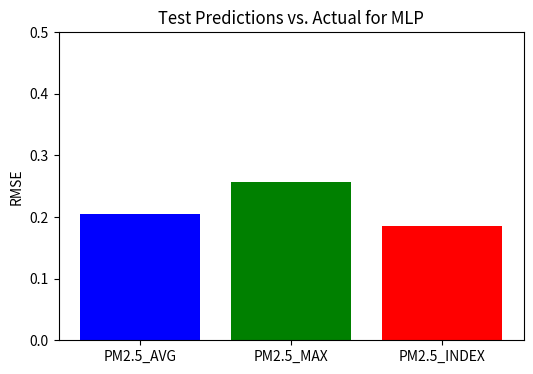

In [28]:
import matplotlib.pyplot as plt

# 绘制直方图
rmse_values = [rmse_avg, rmse_max, rmse_idx]
labels = ['PM2.5_AVG', 'PM2.5_MAX', 'PM2.5_INDEX']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(6, 4))
plt.bar(labels, rmse_values, color=colors)
plt.ylabel('RMSE')
plt.title('Test Predictions vs. Actual for MLP')

plt.yticks(np.arange(0, 0.6, 0.1))  # 设置Y轴刻度和标签

plt.show()


# 靜態 - GRU

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import MinMaxScaler

# 读取数据
df = pd.read_csv('靜態資料.csv', encoding='big5')
df = df.drop(columns=['REGION', 'YEAR'])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

# 分割特征和目标变量
y_avg = df['PM2.5平均']
y_max = df['PM2.5最大']
y_idx = df['PM2.5指標']
X = df.drop(['PM2.5平均', 'PM2.5最大', 'PM2.5指標'], axis=1)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 分割训练集和测试集
X_train, X_test, y_avg_train, y_avg_test = train_test_split(X_scaled, y_avg, test_size=0.2, random_state=12)
_, _, y_max_train, y_max_test = train_test_split(X_scaled, y_max, test_size=0.2, random_state=12)
_, _, y_idx_train, y_idx_test = train_test_split(X_scaled, y_idx, test_size=0.2, random_state=12)

# 建立GRU模型
model_avg = Sequential()
model_avg.add(GRU(64, input_shape=(X_train.shape[1], 1)))
model_avg.add(Dense(1))
model_avg.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError()])

model_max = Sequential()
model_max.add(GRU(64, input_shape=(X_train.shape[1], 1)))
model_max.add(Dense(1))
model_max.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError()])

model_idx = Sequential()
model_idx.add(GRU(64, input_shape=(X_train.shape[1], 1)))
model_idx.add(Dense(1))
model_idx.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError()])

# 进行训练
model_avg.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_avg_train, epochs=50, batch_size=32, verbose=0)
model_max.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_max_train, epochs=50, batch_size=32, verbose=0)
model_idx.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_idx_train, epochs=50, batch_size=32, verbose=0)

# 进行预测
y_avg_pred = model_avg.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
y_max_pred = model_max.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
y_idx_pred = model_idx.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

# 计算均方根误差（RMSE）
rmse_avg = np.sqrt(mean_squared_error(y_avg_test, y_avg_pred))
rmse_max = np.sqrt(mean_squared_error(y_max_test, y_max_pred))
rmse_idx = np.sqrt(mean_squared_error(y_idx_test, y_idx_pred))

print('平均值 RMSE:', rmse_avg)
print('最大值 RMSE:', rmse_max)
print('指標值 RMSE:', rmse_idx)


1/1 [==============================] - 1s 619ms/step
平均值 RMSE: 0.29008482159371707
最大值 RMSE: 0.23375328467970505
指標值 RMSE: 0.2943557181514653


- 繪製圖表

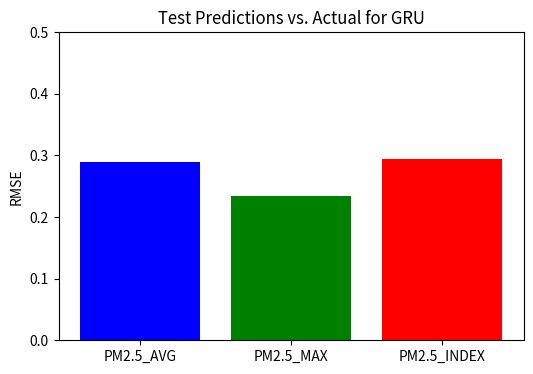

In [31]:
import matplotlib.pyplot as plt

# 绘制直方图
rmse_values = [rmse_avg, rmse_max, rmse_idx]
labels = ['PM2.5_AVG', 'PM2.5_MAX', 'PM2.5_INDEX']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(6, 4))
plt.bar(labels, rmse_values, color=colors)
plt.ylabel('RMSE')
plt.title('Test Predictions vs. Actual for GRU')

plt.yticks(np.arange(0, 0.6, 0.1))  # 设置Y轴刻度和标签

plt.show()


# 靜態 - LSTM

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import MinMaxScaler

# 读取数据
df = pd.read_csv('靜態資料.csv', encoding='big5')
df = df.drop(columns=['REGION', 'YEAR'])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

# 分割特征和目标变量
y_avg = df['PM2.5平均']
y_max = df['PM2.5最大']
y_idx = df['PM2.5指標']
X = df.drop(['PM2.5平均', 'PM2.5最大', 'PM2.5指標'], axis=1)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 分割训练集和测试集
X_train, X_test, y_avg_train, y_avg_test = train_test_split(X_scaled, y_avg, test_size=0.2, random_state=12)
_, _, y_max_train, y_max_test = train_test_split(X_scaled, y_max, test_size=0.2, random_state=12)
_, _, y_idx_train, y_idx_test = train_test_split(X_scaled, y_idx, test_size=0.2, random_state=12)

# 建立LSTM模型
model_avg = Sequential()
model_avg.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model_avg.add(Dense(1))
model_avg.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError()])

model_max = Sequential()
model_max.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model_max.add(Dense(1))
model_max.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError()])

model_idx = Sequential()
model_idx.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model_idx.add(Dense(1))
model_idx.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError()])

# 进行训练
model_avg.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_avg_train, epochs=50, batch_size=32, verbose=0)
model_max.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_max_train, epochs=50, batch_size=32, verbose=0)
model_idx.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_idx_train, epochs=50, batch_size=32, verbose=0)

# 进行预测
y_avg_pred = model_avg.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
y_max_pred = model_max.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
y_idx_pred = model_idx.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

# 计算均方根误差（RMSE）
rmse_avg = np.sqrt(mean_squared_error(y_avg_test, y_avg_pred))
rmse_max = np.sqrt(mean_squared_error(y_max_test, y_max_pred))
rmse_idx = np.sqrt(mean_squared_error(y_idx_test, y_idx_pred))

print('平均值 RMSE:', rmse_avg)
print('最大值 RMSE:', rmse_max)
print('指標值 RMSE:', rmse_idx)


1/1 [==============================] - 0s 426ms/step


1/1 [==============================] - 0s 444ms/step


1/1 [==============================] - 0s 456ms/step
平均值 RMSE: 0.2824668566412159
最大值 RMSE: 0.23764597111027705
指標值 RMSE: 0.2967531378864865


- 繪製圖表

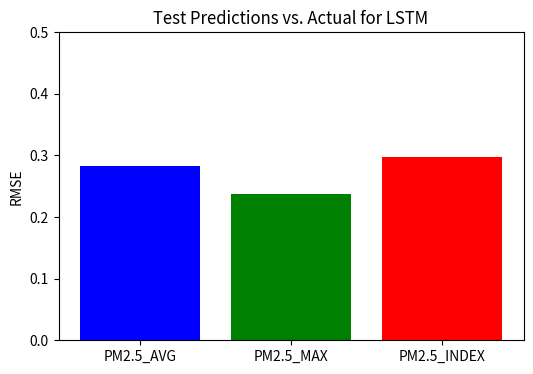

In [33]:
import matplotlib.pyplot as plt

# 绘制直方图
rmse_values = [rmse_avg, rmse_max, rmse_idx]
labels = ['PM2.5_AVG', 'PM2.5_MAX', 'PM2.5_INDEX']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(6, 4))
plt.bar(labels, rmse_values, color=colors)
plt.ylabel('RMSE')
plt.title('Test Predictions vs. Actual for LSTM')

plt.yticks(np.arange(0, 0.6, 0.1))  # 设置Y轴刻度和标签

plt.show()


# 靜態  - SVM

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

# Import CSV file into a dataframe
df = pd.read_csv('靜態資料.csv', encoding='big5')
df = df.drop(columns=['REGION', 'YEAR'])

y = df['PM2.5平均']
X = df.drop(['PM2.5平均', 'PM2.5最大', 'PM2.5指標'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1234)

# Create SVM Regressor object
svr = SVR()

# Fit the model to the training data
svr.fit(X_train, y_train)

# Make predictions using the testing set
svr_pred = svr.predict(X_test)

# The mean squared error
print("SVM RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, svr_pred)))


SVM RMSE: 3.17


In [ ]:
## 跑了網格搜索找參數，但結果更差??

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer
from math import sqrt

# 创建 SVR 模型对象
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(svr, param_grid, scoring=make_scorer(mean_squared_error), cv=5)

# 在训练集上进行参数搜索和拟合
grid_search.fit(X_train, y_train)

# 打印最佳参数组合
print("Best Parameters: ", grid_search.best_params_)

# 使用最佳参数组合进行预测
svr_pred = grid_search.predict(X_test)

# 计算均方根误差
rmse = sqrt(mean_squared_error(y_test, svr_pred))
print("Root Mean Squared Error: %.2f" % rmse)


Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Root Mean Squared Error: 7952359.05


# 靜態 - Dicision tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# 导入数据
df = pd.read_csv('靜態資料.csv', encoding='big5')
df = df.drop(columns=['REGION', 'YEAR'])

# 划分训练集和测试集
y = df['PM2.5平均']
X = df.drop(['PM2.5平均', 'PM2.5最大', 'PM2.5指標'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

# 创建决策树回归模型对象
dt_regr = DecisionTreeRegressor()

# 在训练集上拟合模型
dt_regr.fit(X_train, y_train)

# 在测试集上进行预测
dt_pred = dt_regr.predict(X_test)

# 计算均方根误差
rmse = sqrt(mean_squared_error(y_test, dt_pred))
print("DT RMSE: %.2f" % rmse)


DT RMSE: 3.08


# 靜態 - 皮爾遜相關係數

## 載入中文字體

In [1]:
# 下載台北思源黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-07-21 08:47:40--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.101, 142.251.2.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dfphv60l45bqn7oip8h075dkecgf0ga1/1689929250000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=fd142510-23cf-47d6-a274-370fdda4f6c3 [following]
--2023-07-21 08:47:41--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dfphv60l45bqn7oip8h075dkecgf0ga1/1689929250000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=fd142510-23cf-47d6-a274-370fdda4f6c3
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc-0k-9o-d

## 相關性分析圖表


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

data = pd.read_csv('靜態_相關性_平均.csv', encoding='big5')

correlation_matrix = data.corr(method='pearson')

# 打印与'PM2.5'列的相关性
pm25_correlation = correlation_matrix['PM2.5平均']
print(pm25_correlation)

# 获取前三个最相关的特征
top_related_features = pm25_correlation.abs().nlargest(4).index[1:].tolist()
# top_related_features = pm25_correlation.abs().nlargest(3).index.tolist()

# 获取前三个最不相关的特征
top_unrelated_features = pm25_correlation.abs().nsmallest(3).index.tolist()

print("前三個最相關的特徵：", top_related_features)
print("前三個最不相關的特徵：", top_unrelated_features)


PM2.5最大         1.000000
人口密度           -0.524909
遷入人數           -0.564098
遷出人數           -0.650784
工業              0.572565
服務業            -0.628985
農林漁牧            0.598920
可支配所得          -0.706932
工業區分布           0.760940
Covid確診數       -0.122941
機動車輛登記數        -0.065705
假日_出口          -0.467048
平日_出口          -0.468372
交通死傷數           0.576816
大型焚化廠處理量       -0.042351
營造業家數           0.067752
都市計畫區面積        -0.301188
違反列管毒性化學運作家次    0.015194
事業廢水列管家數        0.280878
豬隻密度            0.615629
工廠密度           -0.237076
營運中工廠數         -0.035720
道路面積            0.525328
台電售電量           0.689926
森林佔土地比         -0.367738
觀光旅館住用率         0.105368
Name: PM2.5最大, dtype: float64
前三個最相關的特徵： ['工業區分布', '可支配所得', '台電售電量']
前三個最不相關的特徵： ['違反列管毒性化學運作家次', '營運中工廠數', '大型焚化廠處理量']


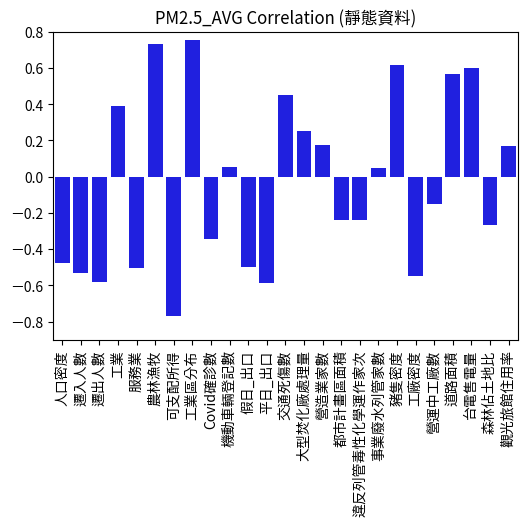

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 讀取數據
data = pd.read_csv('靜態_相關性_平均.csv', encoding='big5')
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)

# 提取相關性資料
corr_data = data.corr()['PM2.5平均'].drop('PM2.5平均')

# 設置圖表大小
plt.figure(figsize=(6, 4))

# 繪製長條圖
sns.barplot(x=corr_data.index, y=corr_data.values, color='blue')

# 設置標籤和標題
# plt.xlabel('變數')
# plt.ylabel('相關性')
plt.title('PM2.5_AVG Correlation (靜態資料)')
# plt.xlim([0, 0.01])  # 固定x軸範圍
plt.ylim([-0.9, 0.8])  # 固定y軸範圍

# 調整x軸標籤旋轉角度
plt.xticks(rotation=90)

# 顯示圖表
plt.show()


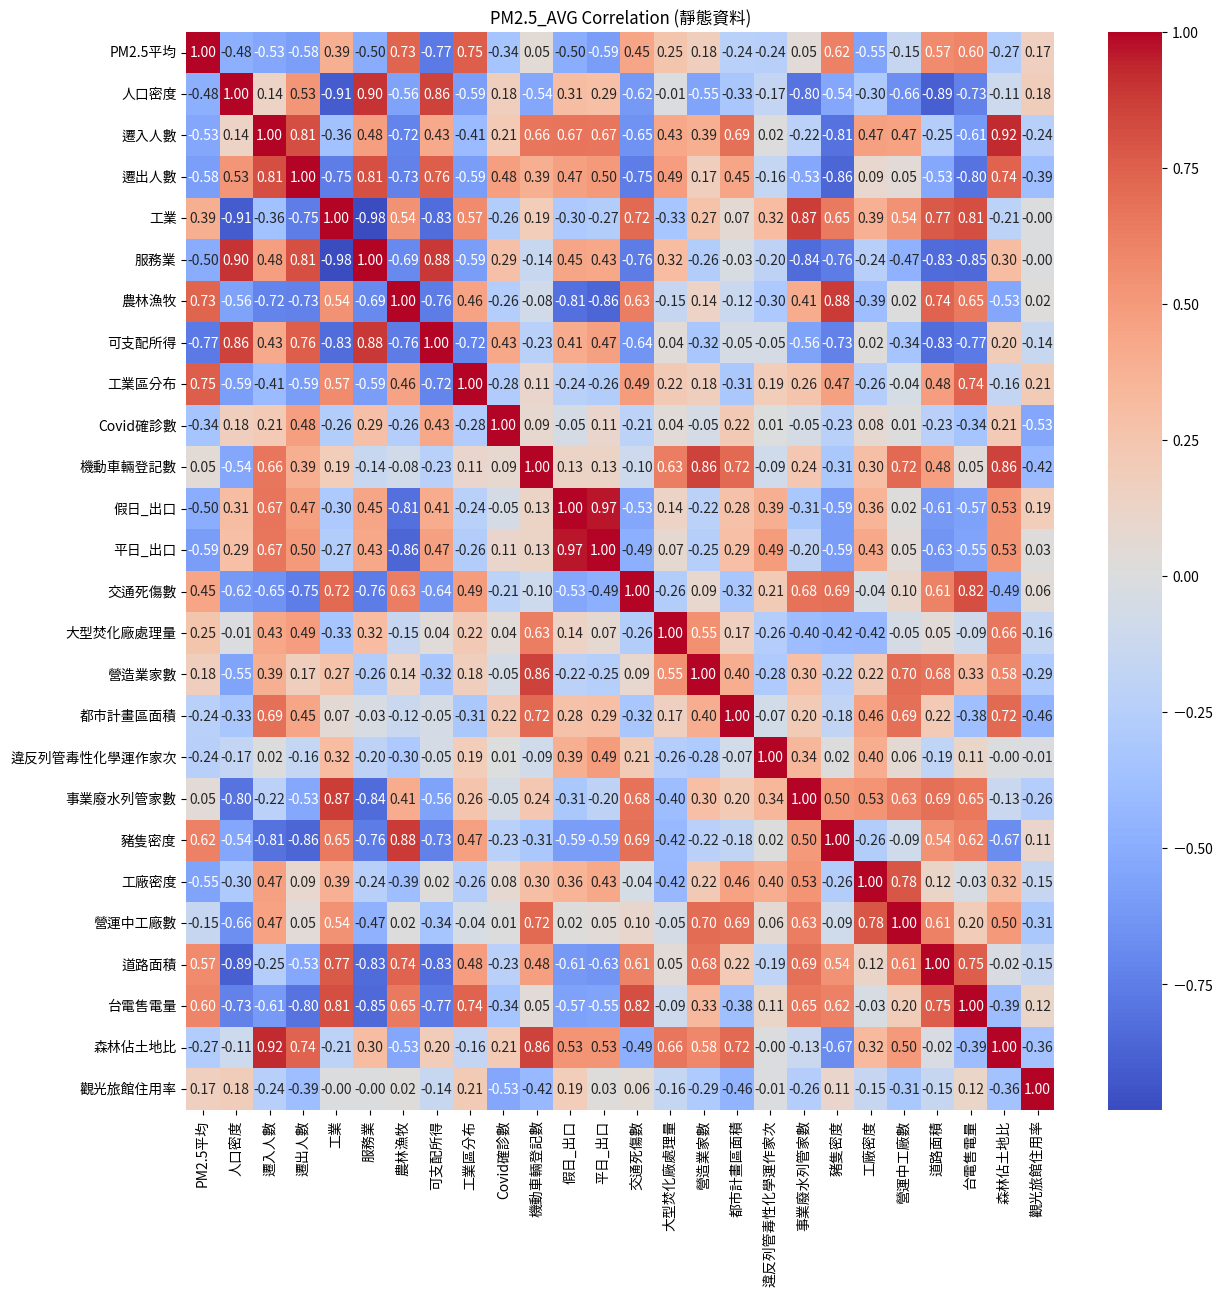

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('靜態_相關性_平均.csv', encoding='big5')

# 计算相关性矩阵
corr_matrix = data.corr()

# 设置图表大小
plt.figure(figsize=(14, 14))

# 绘制热力图，设置格式为小数点后两位
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# 设置标题
plt.title('PM2.5_AVG Correlation (靜態資料)')

# 显示图表
plt.show()


In [18]:
import pandas as pd

# 讀取數據
data = pd.read_csv('靜態_相關性_平均.csv', encoding='big5')

# 計算相關性矩陣
correlation_matrix = data.corr()

# 取得相關性矩陣中"PM2.5平均"這一列的相關性
pm25_avg_correlation = correlation_matrix['PM2.5平均']

# 取得相關性矩陣中"PM2.5平均"最相關的前五項
top_pm25_avg_corr = pm25_avg_correlation.sort_values(ascending=False)[1:6]

# 取得相關性矩陣中"PM2.5平均"最不相關的前五項
bottom_pm25_avg_corr = pm25_avg_correlation.sort_values(ascending=True)[:5]

# 列印結果
print("與\"PM2.5平均\"正相關的前五項排名：")
print(top_pm25_avg_corr)
print("\n與\"PM2.5平均\"負相關的前五項排名：")
print(bottom_pm25_avg_corr)


與"PM2.5平均"正相關的前五項排名：
工業區分布    0.753209
農林漁牧     0.732355
豬隻密度     0.615339
台電售電量    0.602204
道路面積     0.566803
Name: PM2.5平均, dtype: float64

與"PM2.5平均"負相關的前五項排名：
可支配所得   -0.769279
平日_出口   -0.588491
遷出人數    -0.580031
工廠密度    -0.547927
遷入人數    -0.532246
Name: PM2.5平均, dtype: float64
